<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)" data-toc-modified-id="-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)</center></a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Task-0." data-toc-modified-id="Task-0.-1.0.0.1"><span class="toc-item-num">1.0.0.1&nbsp;&nbsp;</span>Task 0.</a></span></li><li><span><a href="#Task-1." data-toc-modified-id="Task-1.-1.0.0.2"><span class="toc-item-num">1.0.0.2&nbsp;&nbsp;</span>Task 1.</a></span></li><li><span><a href="#Task-2:" data-toc-modified-id="Task-2:-1.0.0.3"><span class="toc-item-num">1.0.0.3&nbsp;&nbsp;</span>Task 2:</a></span></li><li><span><a href="#Task-3:" data-toc-modified-id="Task-3:-1.0.0.4"><span class="toc-item-num">1.0.0.4&nbsp;&nbsp;</span>Task 3:</a></span></li><li><span><a href="#Task-4:" data-toc-modified-id="Task-4:-1.0.0.5"><span class="toc-item-num">1.0.0.5&nbsp;&nbsp;</span>Task 4:</a></span></li><li><span><a href="#Task-5:" data-toc-modified-id="Task-5:-1.0.0.6"><span class="toc-item-num">1.0.0.6&nbsp;&nbsp;</span>Task 5:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.7"><span class="toc-item-num">1.0.0.7&nbsp;&nbsp;</span>Вопросы:</a></span></li><li><span><a href="#Task-6:" data-toc-modified-id="Task-6:-1.0.0.8"><span class="toc-item-num">1.0.0.8&nbsp;&nbsp;</span>Task 6:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.9"><span class="toc-item-num">1.0.0.9&nbsp;&nbsp;</span>Вопросы:</a></span></li></ul></li></ul></li></ul></li></ul></div>

# <center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Ещё раз (как и в задании 1) считайте в переменные tr_mcc_codes, tr_types, transactions и customers_gender_train. В transactions опять считайте только первые 1000000 строк.

In [2]:
data_transactions = pd.read_csv("data/transactions.csv", sep=',')
data_mcc = pd.read_csv("data/tr_mcc_codes.csv", sep=";")
data_types = pd.read_csv("data/tr_types.csv", sep=";")
data_gender = pd.read_csv("data/gender_train.csv", sep=",")

In [3]:
data_mcc.head()

,mcc_code,mcc_description
0,742,Ветеринарные услуги
1,1711,"Генеральные подрядчики по вентиляции, теплосна..."
2,1731,Подрядчики по электричеству
3,1799,"Подрядчики, специализированная торговля — нигд..."
4,2741,Разнообразные издательства/печатное дело


In [4]:
data_types.head()

,tr_type,tr_description
0,3200,Плата за предоставление услуг посредством моби...
1,3210,Плата за предоставление отчета по счету карты ...
2,3800,Плата за обслуживание банковской карты (за пер...
3,4000,Плата за получение наличных в Сбербанке
4,4001,Плата за получение наличных в Сбербанке (в дру...


In [5]:
data_gender.head()

,customer_id,gender
0,10928546,1
1,69348468,1
2,61009479,0
3,74045822,0
4,27979606,1


In [6]:
data_transactions = data_transactions.head(1000000)
data_transactions.head()

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN
1,39026145,1 10:19:29,6011,7010,56147.89,NaN
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN
4,39026145,2 15:33:42,5499,1010,-920.83,NaN


#### Task 0.
Соедините transactions с всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с customers_gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки.

In [7]:
result_1 = pd.merge(data_transactions,
                 data_gender[['customer_id','gender']],
                 on='customer_id',
                 how='left')
result_2 = pd.merge(result_1,
                    data_mcc,
                    on='mcc_code',
                    how='inner')
result_3 = pd.merge(result_2,
                    data_types,
                    on='tr_type',
                    how='inner')
table = result_3
table

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
5,39026145,11 14:15:30,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
6,39026145,13 11:17:34,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
7,39026145,18 07:39:05,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
8,39026145,19 13:24:35,4814,1030,-449.18,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
9,39026145,19 13:25:31,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ


#### Task 1.
1. Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount). (*)

Выведите ответ в виде вещественного числа, округлённого до двух знаков после запятой, отделив дробную часть точкой в формате "123.45"

##### Пояснения:
(\*) Если в результате для мужчин получились значения [-1,-3,-5], а для женщин [-1,-2,-3],  
то модуль разницы между средними арифметическими -3 и -2 будет равен 1.

(\**) Обратите внимание, что для вычисления модуля разности точных знаний о том,  
какой класc относится к мужчинам, а какой - к женщинам, пока не требуется.

(\***) Округление не нужно производить отдельно по средним тратам женщин и мужчин, а только в самом конце, когда получите значение модуля разницы трат.

In [8]:
table_waste = table[table.amount<0]
gender_1_mean_waste = (table_waste[table_waste.gender == 1.0]).amount.mean()
gender_2_mean_waste = (table_waste[table_waste.gender == 0.0]).amount.mean()
result = abs(gender_2_mean_waste-gender_1_mean_waste)
result

32718.05492021877

Ответ: 32718.05

#### Task 2:
1. Создайте новый столбец - mcc_code+tr_type, сконкатенировав значения из соответствующих столбцов. (\*)
2. Оставьте только наблюдения с отрицательным значением amount. Посчитайте дисперсию по категориям получившегося столбца mcc_code+tr_type, в которых количество наблюдений >= 10. 
3. Определите отношение максимальной дисперсии к минимальной.

Выведите ответ в виде вещественного числа, округлённого до ближайшего целого в формате "123456" без дробной части.

##### Пояснения:
(\*) Для конкатенации значений в столбцах можно использовать метод .astype(str) для серии и складывать соответствующие серии. Либо же применять apply к строкам датафрейма, прописывая логику преобразования и конкатенации значений внутри.

(\**) Для одновременного подсчета количества наблюдений и дисперсии по категориям можно воспользоваться функцией .agg()

In [9]:
table_2 = table.copy()
table_2['mcc_type'] = table_2['mcc_code'].astype(str) + table_2['tr_type'].astype(str)
table_2 = table_2[table_2.amount < 0]
table_2

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,mcc_type
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030
5,39026145,11 14:15:30,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030
6,39026145,13 11:17:34,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030
7,39026145,18 07:39:05,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030
8,39026145,19 13:24:35,4814,1030,-449.18,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030
9,39026145,19 13:25:31,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030


In [10]:
f = lambda x: x.tr_datetime.count() >= 10
gb = table_2.groupby('mcc_type').filter(f)
gb = gb.groupby('mcc_type').amount.agg([lambda x: np.var(x)])
gb = gb.rename(columns={'<lambda>':'var_'})
result = gb.var_.max() / gb.var_.min() 
result

8655155.499139175

Ответ: 8655155

#### Task 3:
1. По всем типам транзакций рассчитайте максимальную сумму прихода на карту (из строго положительных сумм по столбцу amount) отдельно для мужчин и женщин (назовите ее "max_income"). Оставьте по 5 транзакций для мужчин и для женщин, наименьших среди всех транзакций по полученным значениям "max_income". (\*)
2. Выделите среди них те, которые встречаются одновременно и у мужчин, и у женщин:
    - 1) Покупка. POS ТУ СБ РФ	
    - 2) Списание после проведения претензионной работы	
    - 3) Плата за получение наличных. Россия	
    - 4) Перевод на карту/ с карты через АТМ (со взиманием комиссии с отправителя) по счету в овердрафте	
    - 5) Плата за получение наличных в АТМ. Россия	 
    - 6) Наличные. Зарубеж. банк	
    - 7) Возврат покупки. POS ТУ Россия

##### Пояснения:
(\*) Если максимальные суммы приходов по каким-то типам были равны [1,2,3,4,5,6,7,8], то 5 минимальных из них: [1,2,3,4,5]

In [40]:
table_inc = table[table.amount > 0]
gb = table_inc.groupby(['tr_type', 'gender']).amount.agg( {"max_income": "max"})
gb

/Users/ryzkovartem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


max_income
tr_type gender              
1010    0.0     2.483983e+04
        1.0     2.880387e+04
1100    0.0     2.097006e+06
        1.0     1.637273e+05
1110    0.0     3.930353e+05
        1.0     2.212227e+05
1200    0.0     5.755518e+05
        1.0     4.132485e+05
1210    0.0     8.364487e+04
        1.0     1.590261e+05
2010    0.0     4.491832e+04
        1.0     8.983663e+04
2020    1.0     2.245920e+03
2110    0.0     2.245916e+04
        1.0     1.122958e+05
2210    0.0     6.831582e+04
2331    0.0     1.122958e+05
2370    0.0     2.335750e+03
        1.0     1.131941e+05
4051    0.0     1.122960e+03
4100    0.0     5.041860e+03
4110    0.0     2.245920e+03
        1.0     2.245920e+03
4210    0.0     2.245920e+03
6000    0.0     1.498385e+06
        1.0     7.928083e+04
6010    0.0     3.298577e+05
        1.0     9.753114e+05
6100    0.0     3.698484e+05
        1.0     6.573796e+05
...                      ...
7015    0.0     4.828719e+05
        1.0     1.212794e+05
7020    0.0     2.245916e+07
        1.0     2.133620e+07
7021    0.0     1.367763e+07
        1.0     1.796733e+07
7024    0.0     4.491832e+05
        1.0     9.657438e+06
7030    0.0     5.614789e+06
        1.0     6.737747e+06
7031    0.0     6.513156e+06
        1.0     5.614789e+06
7034    0.0     2.245916e+06
        1.0     1.572141e+06
7035    0.0     2.762476e+05
        1.0     6.737747e+05
7040    0.0     2.245916e+05
        1.0     3.847254e+05
7041    0.0     3.368874e+06
        1.0     8.759072e+04
7070    0.0     6.737747e+07
        1.0     1.459845e+08
7071    0.0     1.122958e+07
        1.0     1.111728e+07
7074    0.0     6.737747e+06
        1.0     2.245916e+06
7075    0.0     6.737750e+03
        1.0     4.379536e+05
8100    1.0     6.468237e+04
8145    0.0     3.201459e+05

[72 rows x 1 columns]

In [41]:
gb=gb.reset_index()
gb_gender_0 = gb[gb.gender==0.0]
gb_gender_0 = gb_gender_0.sort_values(by='max_income')
gb_gender_1 = gb[gb.gender==1.0]
gb_gender_1 = gb_gender_1.sort_values(by='max_income')

In [42]:
gb_gender_0 = pd.merge(gb_gender_0,
                    data_types,
                    on='tr_type',
                    how='inner')
gb_gender_0.head()

,tr_type,gender,max_income,tr_description
0,4051,0.0,1122.96,Плата за перевод на карту (с карты) через АТМ ...
1,4110,0.0,2245.92,Плата за получение наличных в АТМ. Россия
2,4210,0.0,2245.92,Плата за получение наличных в АТМ. Зарубеж.
3,2370,0.0,2335.75,Списание с карты на карту по операции <перевод...
4,4100,0.0,5041.86,Плата за получение наличных. Россия


In [43]:
gb_gender_1 = pd.merge(gb_gender_1,
                    data_types,
                    on='tr_type',
                    how='inner')
gb_gender_1.head()

,tr_type,gender,max_income,tr_description
0,4110,1.0,2245.92,Плата за получение наличных в АТМ. Россия
1,2020,1.0,2245.92,Выдача наличных через POS Сбербанка
2,1010,1.0,28803.87,Покупка. POS ТУ СБ РФ
3,8100,1.0,64682.37,Списание после проведения претензионной работы
4,6000,1.0,79280.83,Возврат покупки. ТУ СБ РФ


Плата за получение наличных в АТМ. Россия
Ответ: 5

#### Task 4:
1. Выделите из поля tr_datetime относительный день tr_day (первое число до точного времени). (\*)
2. Отфильтруйте строки таким образом, чтобы оставить только те транзакции, у которых в соответствующий относительный день tr_day количество уникальных MCC кодов при транзакциях было больше 75 (можно воспользоваться функцией nunique())
3. Сгруппируйте полученный отфильтрованный датафрейм по MCC коду и полу, после чего, пронализировав результат, выберите верные варианты ответов ниже (\**): 
    - 1) gender == 0 - женщины, gender == 1 - мужчины
    - 2) gender == 1 - женщины, gender == 0 - мужчины
    - 3) Абсолютное значение медианы с типом "Флористика" (расходов/приходов) у мужчин выше той же медианы у женщин
    - 4) Абсолютное значение медианы женских трат (расходов/приходов) на ценные бумаги выше мужских
    - 5) Абсолютное значение медианы женских трат (расходов/приходов) в категории "Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков" ниже мужских
    
##### Пояснения:
(\*) Для того, чтобы выделить всё, что стоит до первого пробела, можо использовать строковые методы для датафрейма - .str.split(), например. Либо же реализовывать логику выделения подстроки с помощью метода apply. <br>
(\**) Понять, какой класс к какому типу транзакций (мужские/женские) относится можно, если поизучать типичные для мужчин/женщин категории и сравнить средние/медианы расходов и/или приходов в них.

In [16]:
date_split=table.tr_datetime.str.split(n=1,expand=True)
trans_day = table.copy()
trans_day["tr_day"] = date_split[0]
trans_day

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,tr_day
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,0
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,6
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,8
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,11
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,11
5,39026145,11 14:15:30,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,11
6,39026145,13 11:17:34,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,13
7,39026145,18 07:39:05,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,18
8,39026145,19 13:24:35,4814,1030,-449.18,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,19
9,39026145,19 13:25:31,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,19


In [45]:
f = lambda x: x.mcc_code.nunique() >= 75
gb = trans_day.groupby('tr_day').filter(f)
gb_in = gb[gb.amount > 0]
gb_out = gb[gb.amount < 0]
gb_abs = gb.copy();
gb_abs.amount = np.abs(gb_abs.amount)
gb_in = gb_in.groupby(['mcc_code', 'gender']).amount.agg({ "mean_in": "mean", "median_in": "median" })
gb_out = gb_out.groupby(['mcc_code', 'gender']).amount.agg({ "mean_out": "mean", "median_out": "median" })
gb_abs = gb_abs.groupby(['mcc_code', 'gender']).amount.agg({ "mean_amount": "mean", "median_amount": "median" })

gb_in=gb_in.reset_index()
gb_out=gb_out.reset_index()
gb_abs=gb_abs.reset_index()

/Users/ryzkovartem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  import sys
/Users/ryzkovartem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
/Users/ryzkovartem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  if __name__ == '__main__':


In [46]:
gb_out_r = pd.merge(gb_out,
                    data_mcc,
                    on='mcc_code',
                    how='inner')
gb_out_r = gb_out_r.sort_values(by='mean_out')
pd.options.display.max_rows = 100
gb_out_r.head(100)

,mcc_code,gender,mean_out,median_out,mcc_description
52,5039,1.0,-1.193251e+06,-238067.070,Строительные материалы — нигде более не класси...
12,3351,1.0,-1.047592e+06,-1047591.690,Агентства по аренде автомобилей
237,6010,1.0,-8.526618e+05,-128017.200,Финансовые институты — снятие наличности вручную
329,8299,1.0,-7.619132e+05,-16844.370,Образовательные услуги
148,5681,1.0,-7.441575e+05,-303872.400,Изготовление и продажа меховых изделий
2,1711,0.0,-6.748977e+05,-674897.690,"Генеральные подрядчики по вентиляции, теплосна..."
334,8699,0.0,-5.211075e+05,-521107.480,"Организации, членства, нигде ранее не классифи..."
199,5946,1.0,-4.778836e+05,-22122.270,Магазины фотооборудования и фотоприборов
250,7011,0.0,-4.594801e+05,-146321.415,"Отели, мотели, базы отдыха, сервисы бронирования"
32,4722,1.0,-4.467433e+05,-161363.880,Туристические агентства и организаторы экскурсий


In [47]:
gb_in_r = pd.merge(gb_in,
                    data_mcc,
                    on='mcc_code',
                    how='inner')
gb_in_r = gb_in_r.sort_values(by='mean_in',ascending=False)
gb_in_r.head(100)

,mcc_code,gender,mean_in,median_in,mcc_description
0,3000,0.0,1.186817e+06,1491647.420,"Авиалинии, авиакомпании"
30,5309,1.0,6.413442e+05,641344.155,Беспошлинные магазины Duty Free
91,6011,1.0,3.690670e+05,112295.790,Финансовые институты — снятие наличности автом...
7,4511,0.0,3.566089e+05,46512.690,"Авиалинии, авиакомпании, нигде более не класси..."
2,3501,1.0,3.244338e+05,320166.525,"Жилье — отели, мотели, курорты"
58,5681,1.0,3.221317e+05,322131.700,Изготовление и продажа меховых изделий
111,8099,1.0,3.007281e+05,300728.120,"Практикующие врачи, медицинские услуги, нигде ..."
10,4722,1.0,2.910883e+05,387981.950,Туристические агентства и организаторы экскурсий
90,6011,0.0,2.507791e+05,112295.790,Финансовые институты — снятие наличности автом...
97,6536,1.0,2.466587e+05,247050.730,Денежные переводы MasterCard MoneySend


In [48]:
pd.options.display.max_rows = 5
gb_abs_r = pd.merge(gb_abs,
                    data_mcc,
                    on='mcc_code',
                    how='inner')
mask = gb_abs_r.index[gb_abs_r['mcc_description']=='Флористика'].tolist()
gb_abs_r.iloc[[226,227]]

,mcc_code,gender,mean_amount,median_amount,mcc_description
226,5992,0.0,22291.486845,13890.99,Флористика
227,5992,1.0,26093.348491,19090.28,Флористика


In [49]:
gb_abr_r=gb_abs_r.set_index('mcc_description')
gb_abr_r.loc["Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков"]

,mcc_code,gender,mean_amount,median_amount
mcc_description,,,,
"Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков",5813,0.0,15601.340943,10106.62
"Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков",5813,1.0,29649.440630,13475.49


In [50]:
gb_abr_r.loc["Ценные бумаги: брокеры/дилеры"]

,mcc_code,gender,mean_amount,median_amount
mcc_description,,,,
Ценные бумаги: брокеры/дилеры,6211,0.0,6737.750000,6737.75
Ценные бумаги: брокеры/дилеры,6211,1.0,74039.339308,11229.58


Обозначения:
1 - мужчина
0 - женщина
Ответ: 1, 3, 5

#### Task 5:
1. Разбейте расходы (отрицательные значения сумм) на 5 бакетов amount_bucket равного объёма (с помощью pd.qcut), разбив все траты на категории 'Very High', 'High', 'Middle', 'Low', 'Very Low'. (\*)
2. Оставшиеся неотрицательные траты отнесите к категории 'Income'.
(воспользуйтесь функцией .cat.add_categories('Income') для того, чтобы добавить новую категорию 'Income' к категориям 'Very High', 'High', 'Middle', 'Low', 'Very Low', а затем заполните пустые значения новой категорией).
3. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
3. После этого постройте сводную таблицу, значениями в которой является пол gender, индексы - tr_hour, столбцы - amount_bucket.
4. Отрисуйте полученные результаты, передав их в функцию plot_pivot_table, расположенную ниже.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими.
    - 2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам.
    - 3) Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами.
    - 4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%)
    - 5) Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин.

##### Пояснения:
(\*) Обратите внимание, что в категории Very High Должны оказаться максимальные по модулю отрицательные транзакции. <br>
(\**) Например, для строки "0 10:23:26" час будет равен 10, а для строки "6 07:08:31"- 07. Можно воспользоваться функциями str.split() или str.find() и 
функцией .apply(lambda x: x[])

In [51]:
def plot_pivot_table(pivot_table):
    plt.figure(figsize=(9, 11))
    sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, 
                fmt='.3g', annot_kws={"size": 14, "fontsize": 14})
    plt.xticks(fontsize=15)
    plt.yticks(rotation=0, fontsize=15)
    plt.xlabel('Bucket', size=18)
    plt.ylabel('Hour', fontsize=18)
    plt.title('Gender analysis per bucket and hour', fontsize=20)
    plt.show()

In [52]:
table_waste = table[table.amount < 0]
table_waste.amount = np.abs(table_waste.amount)
table_waste

/Users/ryzkovartem/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description
0,39026145,0 10:23:26,4814,1030,2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
1,39026145,6 07:08:31,4814,1030,5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
...,...,...,...,...,...,...,...,...,...
999565,62693770,333 19:26:37,4900,2320,72385.87,888917,0.0,"Коммунальные услуги — электричество, газ, сани...",Безналичный перевод денежных средств через POS
999566,62693770,333 19:27:26,4900,2320,4491.83,888917,0.0,"Коммунальные услуги — электричество, газ, сани...",Безналичный перевод денежных средств через POS


In [53]:
table_waste['amount_cat'], categs = pd.qcut(table_waste.amount, 5, labels=['Very low','Low','Middle','High','Very high'],
         retbins=True)
table_waste

/Users/ryzkovartem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,amount_cat
0,39026145,0 10:23:26,4814,1030,2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,Very low
1,39026145,6 07:08:31,4814,1030,5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,Low
...,...,...,...,...,...,...,...,...,...,...
999565,62693770,333 19:26:37,4900,2320,72385.87,888917,0.0,"Коммунальные услуги — электричество, газ, сани...",Безналичный перевод денежных средств через POS,Very high
999566,62693770,333 19:27:26,4900,2320,4491.83,888917,0.0,"Коммунальные услуги — электричество, газ, сани...",Безналичный перевод денежных средств через POS,Low


In [54]:
table_cat = table.copy()
table_cat['categ'] = table_waste.amount_cat
table_cat['categ'] = table_cat.categ.cat.add_categories('Income')
table_cat['categ'] = table_cat.categ.fillna("Income")
table_cat

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,categ
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,Very low
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,Low
...,...,...,...,...,...,...,...,...,...,...
999582,89619970,104 23:39:35,3000,6000,408307.49,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,Income
999583,89619970,105 23:38:49,3000,6000,204153.74,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,Income


In [55]:
table_cat['tr_hour']= table_cat.tr_datetime.apply(lambda x: (x.split()[1]).split(':')[0])
table_cat

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,categ,tr_hour
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,Very low,10
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,Low,07
...,...,...,...,...,...,...,...,...,...,...,...
999582,89619970,104 23:39:35,3000,6000,408307.49,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,Income,23
999583,89619970,105 23:38:49,3000,6000,204153.74,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,Income,23


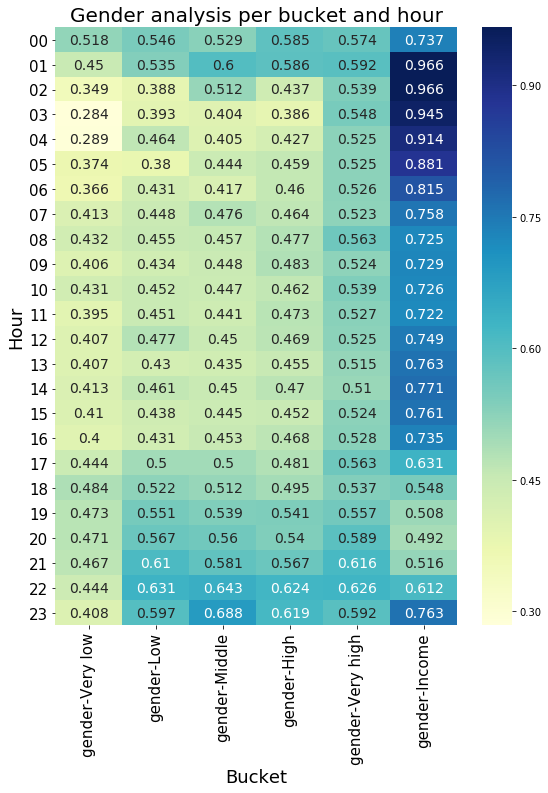

In [56]:
pivot = table_cat.pivot_table(['gender'], index=['tr_hour'],
                 columns='categ')
plot_pivot_table(pivot)

Ответ: 1, 3, 5

#### Task 6:
1. Измените тип поля tr_day на int.
2. Выберите из transactions все MCC коды, которые встретились в выборке более чем 60000 раз.
3. Сгруппируйте отфильтрованный датафрейм по дню и MCC-коду, получая средние значения суммы amount.  
4. Далее отрисуйте зависимость средних сумм (может пригодится метод unstack()) по каждому из MCC-кодов по дням.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) 2 из полученных MCC-кодов связаны с финансовыми институтами
    - 2) 2 MCC кода, связанные со снятием наличности имеют в целом разные знаки (в одном случае почти везде - траты, в другом - пополнения)
    - 3) Бакалейные магазины обладают максимальными средними тратами среди выбранных MCC-кодов
    - 4) Денежные переводы имеют как минимум 3 явных минимума средних
    - 5) Категория "Звонки с использованием телефонов, считывающих магнитную ленту" имеет визуально очень большую дисперсию. 

In [58]:
date_split=table.tr_datetime.str.split(n=1,expand=True)
trans_day = table.copy()
trans_day["tr_day"] = date_split[0]
trans_day["tr_day"]=trans_day["tr_day"].astype('int64')

f = lambda x: x.tr_datetime.count() > 60000
gb = trans_day.groupby('mcc_code').filter(f)
gb = gb.groupby(['tr_day','mcc_code']).amount.agg({ "mean_amount": "mean" })
gb = gb.reset_index()
gb_desc = pd.merge(gb,
                    data_mcc,
                    on='mcc_code',
                    how='inner')
gb_desc = gb_desc.drop(columns=['mcc_code'])
gb_desc = gb_desc.set_index(['tr_day','mcc_description'])
gb_desc = gb_desc.unstack(level = 1)
gb_desc = gb_desc.reset_index()
gb_desc = gb_desc.set_index('tr_day')
gb_desc

/Users/ryzkovartem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


mean_amount                    \
mcc_description Бакалейные магазины, супермаркеты Денежные переводы   
tr_day                                                                
0                                   -15462.567344    -214754.866266   
1                                   -17770.243543    -158317.573750   
...                                           ...               ...   
455                                 -12953.262927    -243267.887869   
456                                 -15411.548528    -274049.766409   

                                                                                \
mcc_description Звонки с использованием телефонов, считывающих магнитную ленту   
tr_day                                                                           
0                                                     -5631.316489               
1                                                     -6375.587685               
...                                                                        ...   
455                                                   -5007.255934               
456                                                   -5945.182500               

                                                                        \
mcc_description Финансовые институты — снятие наличности автоматически   
tr_day                                                                   
0                                                    -55388.115175       
1                                                    -38938.920557       
...                                                                ...   
455                                                  -16193.186198       
456                                                   18406.478780       

                                                                  
mcc_description Финансовые институты — снятие наличности вручную  
tr_day                                                            
0                                                   90390.672987  
1                                                   57658.709639  
...                                                          ...  
455                                                100973.037396  
456                                                109925.614017  

[457 rows x 5 columns]

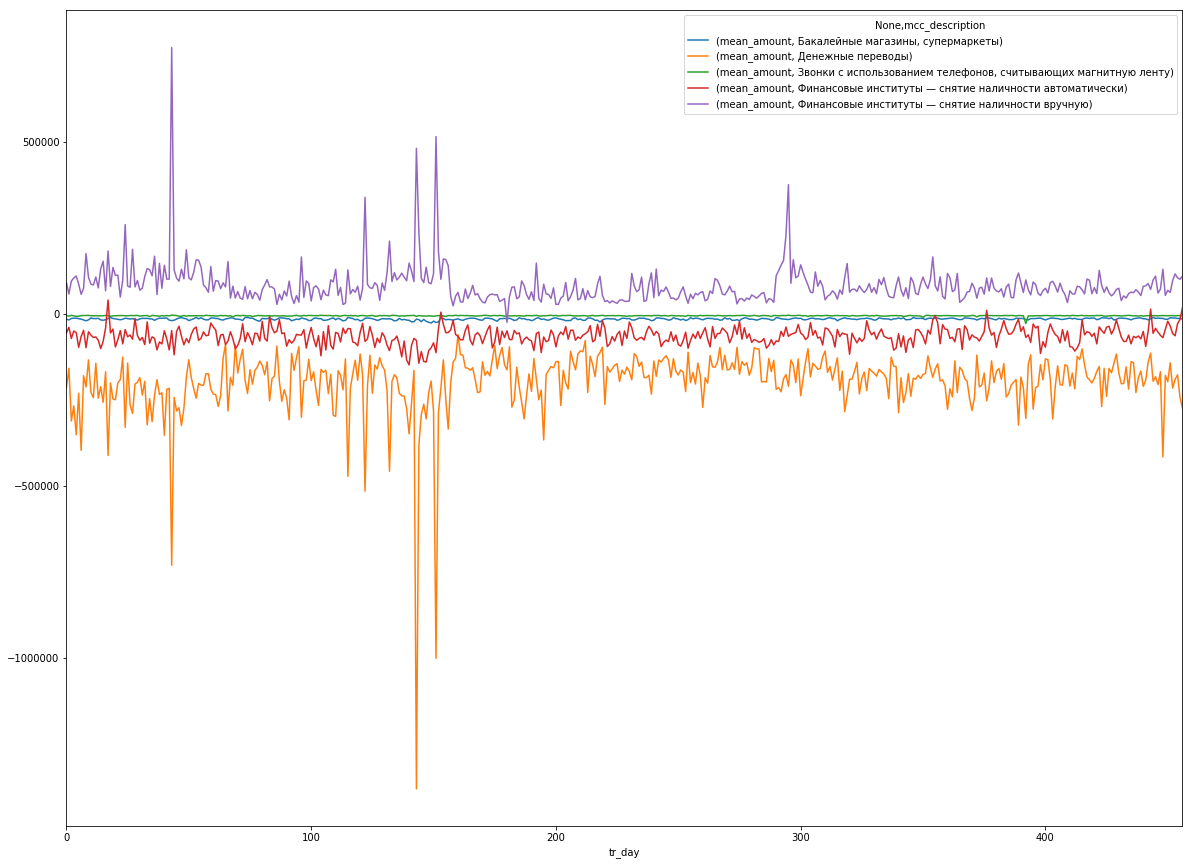

In [59]:
gb_desc.plot(figsize=(20, 15))

Ответ: 1, 2, 4